<a href="https://colab.research.google.com/github/CharlyMech/IEDIB_CEIA_2024-25/blob/main/Sistemas%20de%20BigData/Bloque%205/Actividades/5.1/CE_5074_5_1_Section_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install datashader

In [47]:
!pip install dash

In [48]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/naixements.csv', sep=';', dtype={'Total': str})
df.head()

,Nacional y Comunidades autónomas,Edad de la madre,Orden del nacido vivo,Periodo,Total
0,Total Nacional,Todas las edades,Todos,2023,320.656
1,Total Nacional,Todas las edades,Todos,2022,329.251
2,Total Nacional,Todas las edades,Todos,2021,337.380
3,Total Nacional,Todas las edades,Todos,2020,341.315
4,Total Nacional,Todas las edades,Todos,2019,360.617


In [49]:
# Categorization methods
def categorize_by_age(age):
  if age == 'Todas las edades':
    return None # skip the 'Todas las edades' rows
  elif age in ['Menos de 15 años', '15 años', '16 años', '17 años', '18 años', '19 años']:
    return 'up_to_19'
  elif age in ['20 años', '21 años', '22 años', '23 años', '24 años', '25 años', '26 años', '27 años', '28 años', '29 años']:
    return 'from_20_to_29'
  elif age in ['30 años', '31 años', '32 años', '33 años', '34 años', '35 años', '36 años', '37 años', '38 años', '39 años']:
    return 'from_30_to_39'
  elif age in ['40 años', '41 años', '42 años', '43 años', '44 años', '45 años', '46 años', '47 años', '48 años', '49 años']:
    return 'from_40_to_49'
  else:
    return 'more_than_50'

def categorize_by_child_order(order):
  if order=='Todos':
    return None
  elif order=='Primero':
    return '1st'
  elif order=='Segundo':
    return '2nd'
  else:
    return '3rd_more'


In [50]:
print(f'Before transformation: {type(df["Total"][0])}')
'''
  'Total' column is type FLOAT since there is a dot due to Spanish floating numbers syntax
  We need to work with INT numbers so we first have to transform the data
'''
df['Total'] = df['Total'].apply(lambda x: str(x).replace('.', '')).astype(int) # To string to replace the dot, then to int
print(f'After transformation: {type(df["Total"][0])}')

df.head()

Before transformation: <class 'str'>
After transformation: <class 'numpy.int64'>


,Nacional y Comunidades autónomas,Edad de la madre,Orden del nacido vivo,Periodo,Total
0,Total Nacional,Todas las edades,Todos,2023,320656
1,Total Nacional,Todas las edades,Todos,2022,329251
2,Total Nacional,Todas las edades,Todos,2021,337380
3,Total Nacional,Todas las edades,Todos,2020,341315
4,Total Nacional,Todas las edades,Todos,2019,360617


# 1 - Pie chart with Matplotlib - 2023 group by mother age range

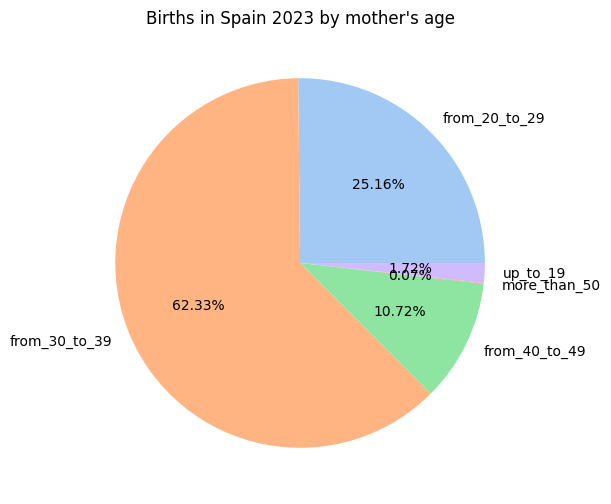

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

df_2023_1 = df[(df['Periodo'] == 2023) & (df['Nacional y Comunidades autónomas'] == 'Total Nacional')
             & (df['Orden del nacido vivo'] == 'Todos')].copy()

df_2023_1['Age group'] = df_2023_1['Edad de la madre'].apply(categorize_by_age)
filtered_data = df_2023_1.groupby('Age group')['Total'].sum().reset_index() # Group&Filter data and sum 'Total' values
'''
  I decided to use the data that has 'Nacional y Comunidades autónomas' as 'Total nacional'
  and 'Edad de la madre' is not 'Todas las edades', since the resulting data frame has the
  compressed data we're looking for
'''

plt.figure(figsize=(12, 6))
color_palette = sns.color_palette('pastel', len(filtered_data))
plt.title('Births in Spain 2023 by mother\'s age')
plt.pie(filtered_data['Total'], labels=filtered_data['Age group'], autopct='%1.2f%%', colors=color_palette)
plt.show()

# 2 - Vertical Bars with Seaborn - Mediterranean Communities births in 2023

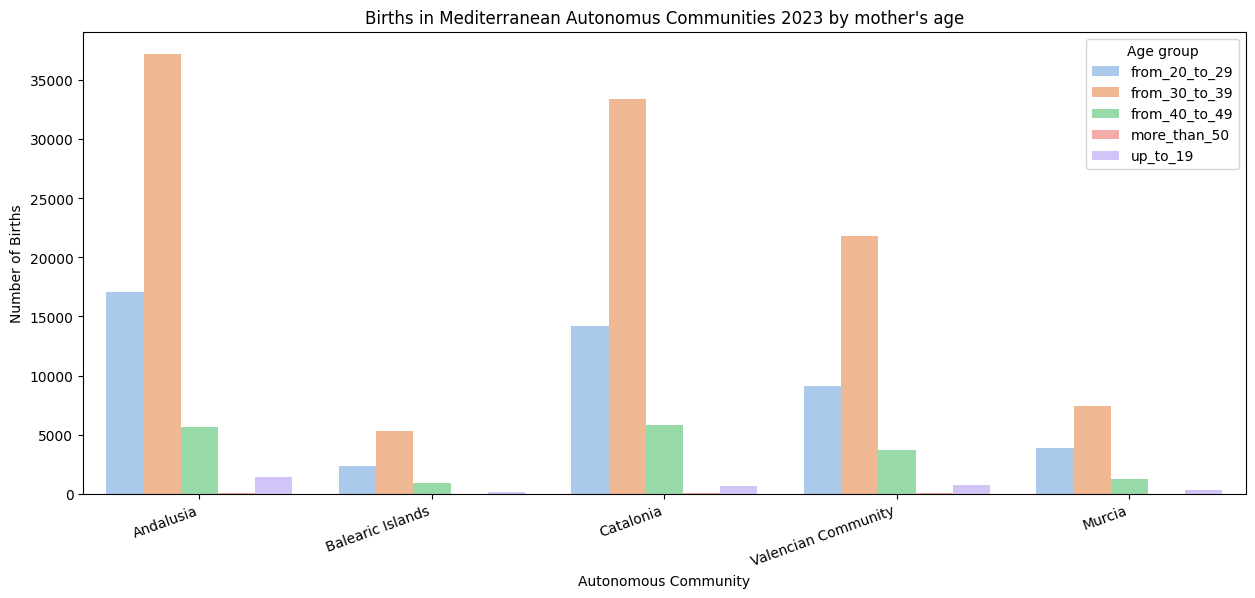

In [52]:
mediterranean_communities = {
    '01 Andalucía': 'Andalusia',
    '04 Balears, Illes': 'Balearic Islands',
    '09 Cataluña': 'Catalonia',
    '10 Comunitat Valenciana': 'Valencian Community',
    '14 Murcia, Región de': 'Murcia',
}
df_2023_2 = df[(df['Periodo'] == 2023) & (df['Nacional y Comunidades autónomas'].isin(mediterranean_communities.keys()))
             & (df['Orden del nacido vivo'] == 'Todos')].copy()
df_2023_2['Age group'] = df_2023_2['Edad de la madre'].apply(categorize_by_age)
filtered_data = df_2023_2.groupby(['Nacional y Comunidades autónomas','Age group'])['Total'].sum().reset_index()
filtered_data['Community'] = filtered_data['Nacional y Comunidades autónomas'].map(mediterranean_communities)

plt.figure(figsize=(15, 6))
sns.barplot(
    data=filtered_data,
    x='Community',
    y='Total',
    hue='Age group',
    palette='pastel',
    dodge=True,
    errorbar=None
)
plt.title('Births in Mediterranean Autonomus Communities 2023 by mother\'s age')
plt.xlabel('Autonomous Community')
plt.ylabel('Number of Births')
plt.legend(title='Age group')
plt.xticks(rotation=20, ha='right')
plt.show()

# 3 - Vertical Bars with Plotly - Births from 2009 to 2023 grouped by order of birth

In [53]:
import plotly.express as px

df_2009_to_2023 = df[(df['Periodo'].between(2009, 2023)) & (df['Orden del nacido vivo'] != 'Todos')
                   & (df['Edad de la madre'] == 'Todas las edades') & (df['Nacional y Comunidades autónomas'] == 'Total Nacional') ].copy()
df_2009_to_2023['Birth order'] = df_2009_to_2023['Orden del nacido vivo'].apply(categorize_by_child_order)
filtered_data = df_2009_to_2023.groupby(['Periodo','Birth order'])['Total'].sum().reset_index()

fig = px.bar(
    filtered_data,
    x='Periodo',
    y='Total',
    color='Birth order',
    barmode='group',
    labels={'Periodo': 'Year', 'Total': 'Number of Births', 'Birth order': 'Birth Order'},
    title='Number of births ordered by birth order (2009-2023)'
)
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.show()

# 4 - Lines and Dots chart with Seaborn - Evolution of the number of births in Spain by birth order (2009-2023)

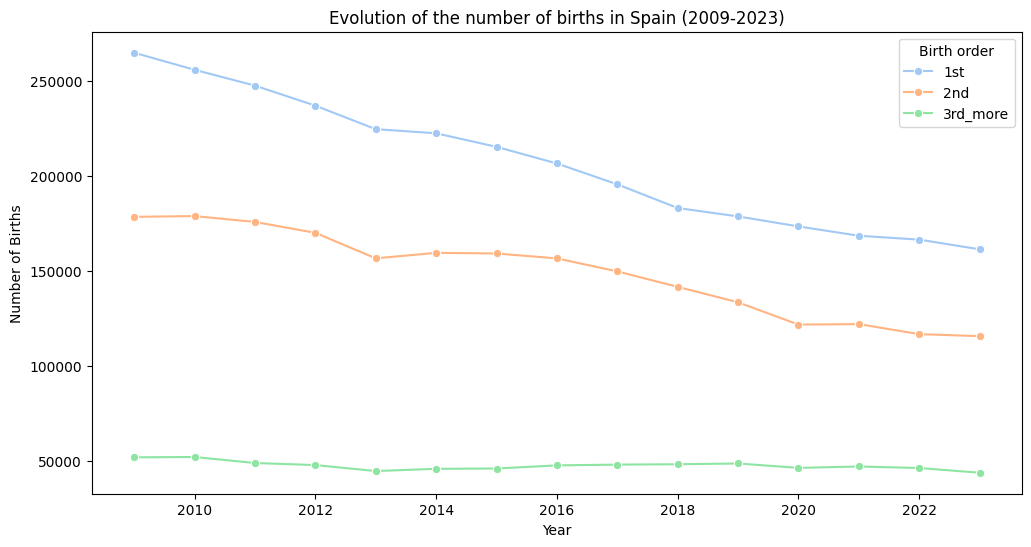

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x='Periodo',
    y='Total',
    hue='Birth order',
    marker='o',
    palette='pastel'
)

plt.title('Evolution of the number of births in Spain (2009-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

# 5 - Lines and Dots chart with Plotly - Evolution of the number of births in Spain by mother's age (2009-2023)

In [55]:
df_2009_to_2023_balearic = df[(df['Nacional y Comunidades autónomas'] == '04 Balears, Illes') & (df['Periodo'].between(2009, 2023))
                            & (df['Orden del nacido vivo'] == 'Todos')].copy()
df_2009_to_2023_balearic['Age group'] = df_2009_to_2023_balearic['Edad de la madre'].apply(categorize_by_age)
filtered_data = df_2009_to_2023_balearic.groupby(['Periodo','Age group'])['Total'].sum().reset_index()

fig = px.line(
    filtered_data,
    x='Periodo',
    y='Total',
    color='Age group',
    markers=True,
    title='Evolution of the number of births in the Balearic Islands (2009-2023)',
    labels={'Total': 'Number of Births', 'Periodo': 'Year', 'Age group': 'Age Group'},
)

fig.show()

# 6 - Box Chart with Seaborn - Number of births in Spain by mother's age (2009-2023)

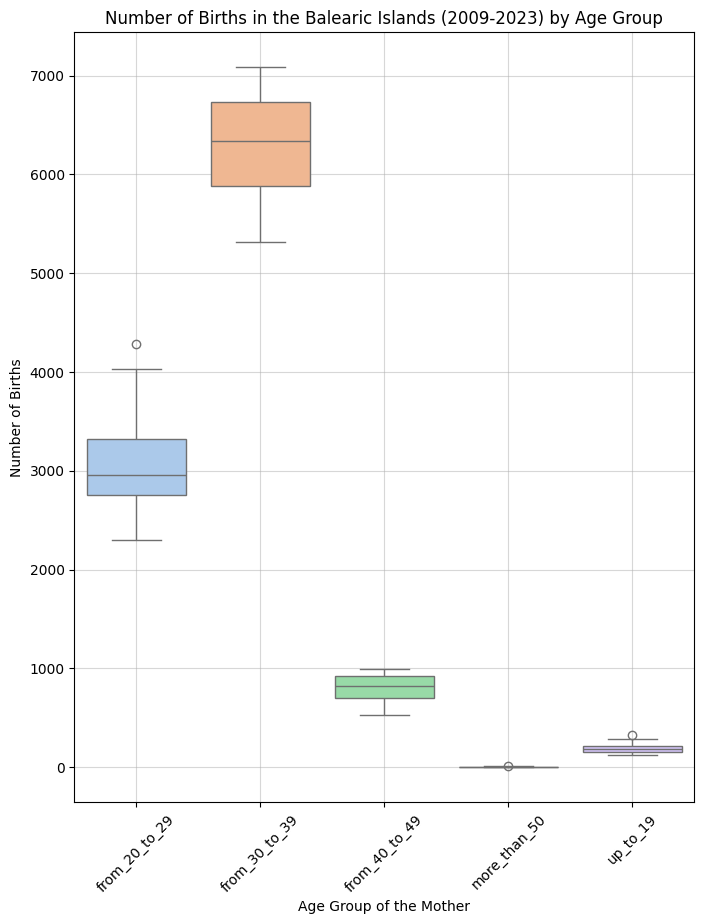

In [56]:
plt.figure(figsize=(8, 10))
sns.boxplot(
    data=filtered_data,
    x='Age group',
    y='Total',
    hue='Age group',
    palette='pastel'
)
plt.xlabel("Age Group of the Mother")
plt.ylabel("Number of Births")
plt.title("Number of Births in the Balearic Islands (2009-2023) by Age Group")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.show()

# 7 - Box Chart with Plotly - Number of births in Mediterranean Communities (2009-2023)

In [57]:
df_2009_to_2023_mediterranean = df[(df['Periodo'].between(2009, 2023)) & (df['Nacional y Comunidades autónomas'].isin(mediterranean_communities.keys()))
                                 & (df['Edad de la madre'] == 'Todas las edades') & (df['Orden del nacido vivo'] == 'Todos')]
filtered_data = df_2009_to_2023_mediterranean.groupby(['Periodo','Nacional y Comunidades autónomas'])['Total'].sum().reset_index()

fig = px.box(
    filtered_data,
    x="Nacional y Comunidades autónomas",
    y="Total",
    color="Nacional y Comunidades autónomas",
    labels={
        "Nacional y Comunidades autónomas": "Autonomous Community",
        "Total": "Number of Births"
    },
    title="Number of Births in Mediterranean Autonomous Communities (2009-2023)",
)
fig.show()

# 8 - Dash interface to Bar Chart - Number of Births per Community

In [58]:
from dash import Dash, dcc, html, Input, Output

communities = [
    {'label': 'Andalusia', 'value': '01 Andalucía'},
    {'label': 'Aragon', 'value': '02 Aragón'},
    {'label': 'Asturias', 'value': '03 Asturias, Principality of'},
    {'label': 'Balearic Islands', 'value': '04 Balears, Illes'},
    {'label': 'Canary Islands', 'value': '05 Canarias'},
    {'label': 'Cantabria', 'value': '06 Cantabria'},
    {'label': 'Castile and León', 'value': '07 Castilla y León'},
    {'label': 'Castile-La Mancha', 'value': '08 Castilla - La Mancha'},
    {'label': 'Catalonia', 'value': '09 Cataluña'},
    {'label': 'Valencian Community', 'value': '10 Comunitat Valenciana'},
    {'label': 'Extremadura', 'value': '11 Extremadura'},
    {'label': 'Galicia', 'value': '12 Galicia'},
    {'label': 'Madrid', 'value': '13 Madrid, Community of'},
    {'label': 'Region of Murcia', 'value': '14 Murcia, Región de'},
    {'label': 'Navarre', 'value': '15 Navarra, Chartered Community of'},
    {'label': 'Basque Country', 'value': '16 País Vasco'},
    {'label': 'La Rioja', 'value': '17 Rioja, La'},
    {'label': 'Ceuta', 'value': '18 Ceuta'},
    {'label': 'Melilla', 'value': '19 Melilla'}
]

app = Dash(__name__)

app.layout = html.Div([
    html.H1('Number of births per age, ordered by child born'),
    dcc.Dropdown(id='dropdown',
                options=communities,
                value = communities[0]['value']),
    dcc.Graph(id='bar-chart-x-graph')
])

@app.callback(
    Output('bar-chart-x-graph', 'figure'),
    Input('dropdown', 'value')
)


def update_bar_chart(selected_value):
  df_total = df[(df['Nacional y Comunidades autónomas'] != 'Total Nacional') & (df['Edad de la madre'] != 'Todas las edades')
               & (df['Orden del nacido vivo'] != 'Todos')].copy()
  df_total['Age group'] = df_total['Edad de la madre'].apply(categorize_by_age)
  df_total['Birth Order'] = df_total['Orden del nacido vivo'].apply(categorize_by_child_order)
  filtered_data = df_total[df_total['Nacional y Comunidades autónomas'] == selected_value].groupby(['Age group', 'Birth Order'])['Total'].sum().reset_index()
  fig = px.bar(filtered_data, x='Age group', y='Total', color='Birth Order', barmode='group')
  return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [59]:
# !pip list >> requirements.txt